<h1 align="center">
  <a href="https://portkey.ai">
    <img width="300" src="https://analyticsindiamag.com/wp-content/uploads/2023/08/Logo-on-white-background.png" alt="portkey">
  </a>
</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BS2K6Svx7yEoYJpOz9yCYvspWHMqA6AA?usp=sharing)

## Use Claude 3.5 Sonnet with OpenAI Compatibility using Portkey!

Since Portkey is fully compatible with the OpenAI signature, you can connect to the Portkey AI Gateway through OpenAI Client.

- Set the `base_url` as `PORTKEY_GATEWAY_URL`
- Add `default_headers` to consume the headers needed by Portkey using the `createHeaders` helper method.

You will need Portkey and anthropic API keys to run this notebook.

- Sign up for Portkey and generate your API key [here](https://app.portkey.ai/).
- Get your anthropic API key [here](https://console.anthropic.com/keys)

In [ ]:
!pip install -qU portkey-ai openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.8/326.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00


## With OpenAI Client

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key= userdata.get('ANTHROPIC_API_KEY'), ## replace it your anthropic API key
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        provider="anthropic",
        api_key= userdata.get('PORTKEY_API_KEY'), ## replace it your Portkey API key
    )
)

chat_complete = client.chat.completions.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens = 1000,
    messages=[{"role": "user",
               "content": "Say hi!"}],
)

print(chat_complete.choices[0].message.content)

Hi there! How can I assist you today?


## With Portkey Client

Note: You can safely store your Anthropic API key in [Portkey](https://app.portkey.ai/) and access models using virtual key


In [ ]:
from portkey_ai import Portkey

portkey = Portkey(
    api_key = userdata.get('PORTKEY_API_KEY'),   # replace with your Portkey API key
    virtual_key= "anthropic-9e8db9",   # replace with your virtual key for anthropic AI
)

In [ ]:
completion = portkey.chat.completions.create(
    messages= [{ "role": 'user', "content": 'Who are you?'}],
    model= 'claude-3-5-sonnet-20240620',
    max_tokens=250
)

print(completion)

{
    "id": "msg_018P6LNLMATHF38xGpCvbEoP",
    "choices": [
        {
            "finish_reason": "end_turn",
            "index": 0,
            "logprobs": null,
            "message": {
                "content": "I am an AI assistant called Claude, created by Anthropic to be helpful, harmless, and honest. I don't have a physical body or avatar - I'm a language model trained to engage in conversation and help with tasks. How can I assist you today?",
                "role": "assistant",
                "function_call": null,
                "tool_calls": null
            }
        }
    ],
    "created": 1718894698,
    "model": "claude-3-5-sonnet-20240620",
    "object": "chat_completion",
    "system_fingerprint": null,
    "usage": {
        "prompt_tokens": 11,
        "completion_tokens": 58,
        "total_tokens": 69
    }
}


## Advanced Routing - Load Balancing

With load balancing, you can distribute load effectively across multiple API keys or providers based on custom weights to ensure high availability and optimal performance.

Let's take an example where we might want to split traffic between anthropic's `llama-3-70b` and OpenAI's `gpt-3.5` giving a weightage of 70-30.

The gateway configuration for this would look like the following:

In [ ]:
config = {
  "strategy": {
      "mode": "loadbalance",
  },
  "targets": [
    {
      "virtual_key": "anthropic-431005", # anthropic virtual key
      "override_params": {"model": "llama3-70b-8192"},
      "weight": 0.7
    },
    {
      "virtual_key": "gpt3-8070a6", # OpenAI virtual key
      "override_params": {"model": "gpt-3.5-turbo-0125"},
      "weight": 0.3

    }
  ]
}

In [ ]:
from openai import OpenAI
from portkey_ai import PORTKEY_GATEWAY_URL, createHeaders
from google.colab import userdata

client = OpenAI(
    api_key="X",
    base_url=PORTKEY_GATEWAY_URL,
    default_headers=createHeaders(
        api_key=userdata.get("PORTKEY_API_KEY"),
        config=config
    )
)

chat_complete = client.chat.completions.create(
    model="X",
    messages=[{"role": "user",
               "content": "Just say hi!"}],
)

print(chat_complete.model)
print(chat_complete.choices[0].message.content)

gpt-3.5-turbo-0125
Hi! How can I assist you today?


## Observability with Portkey

By routing requests through Portkey you can track a number of metrics like - tokens used, latency, cost, etc.

Here's a screenshot of the dashboard you get with Portkey!

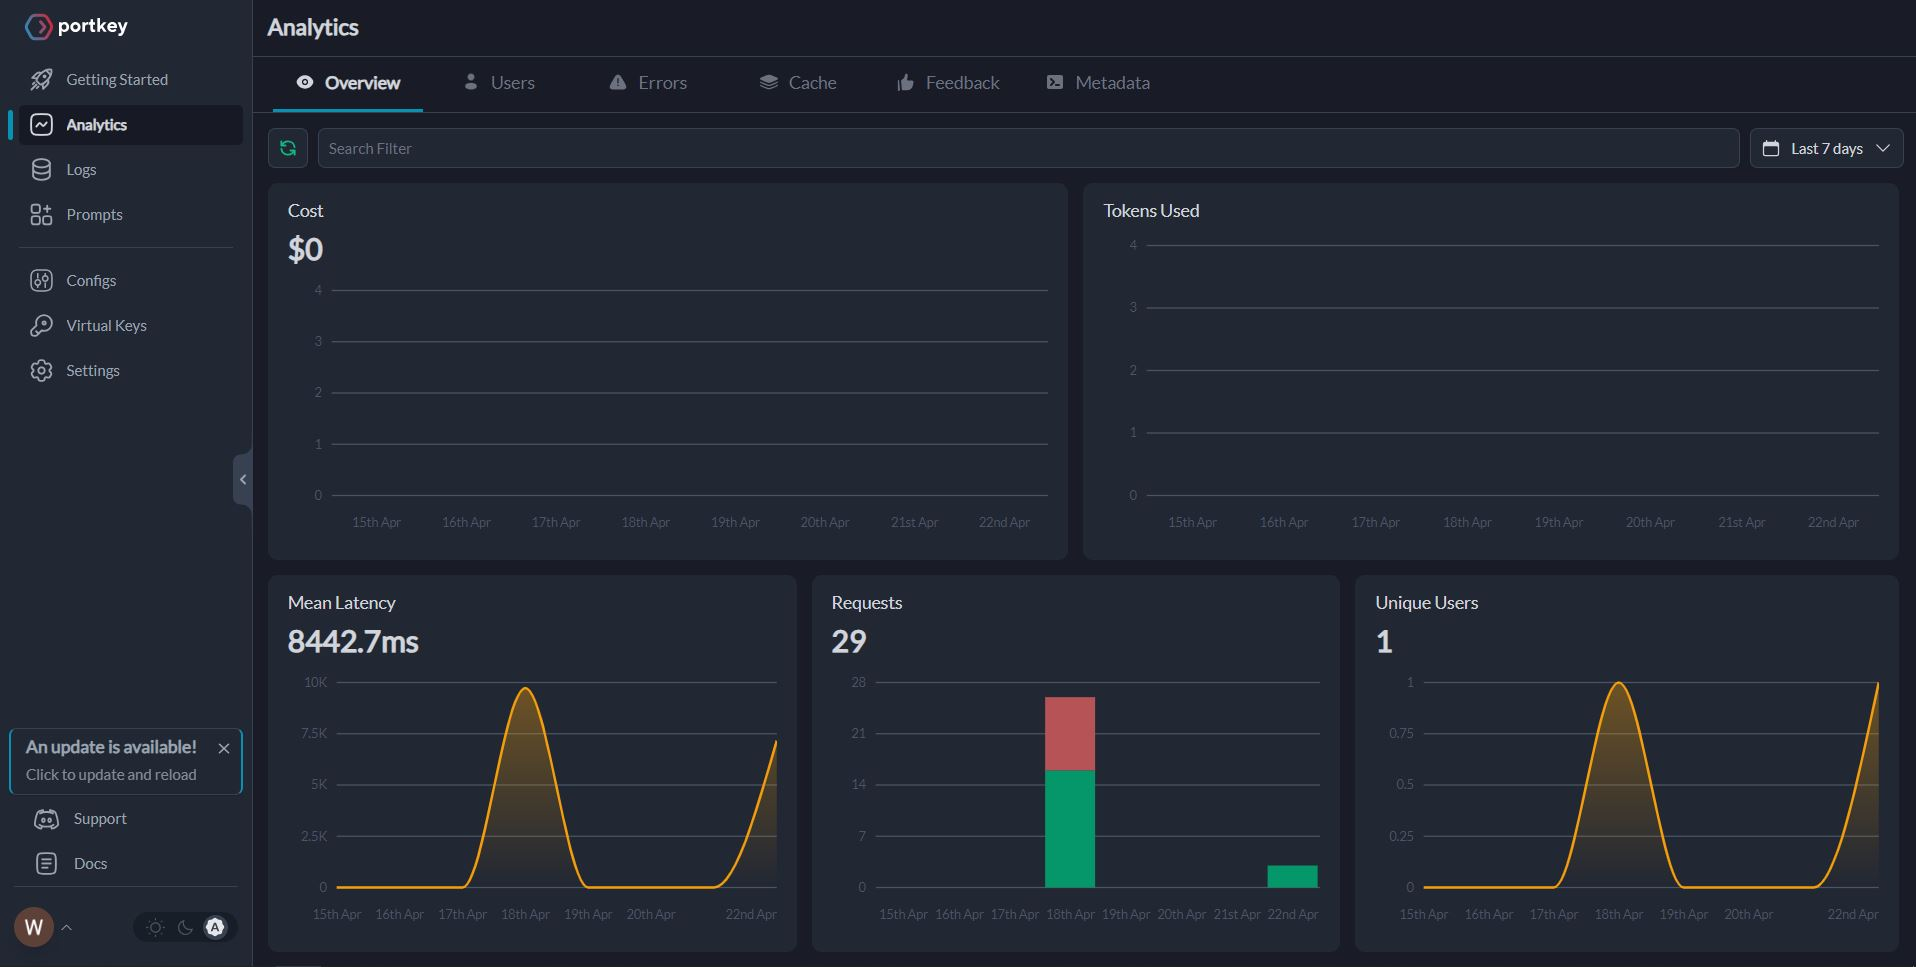